In [8]:
"""
Project CS 5010
Jesse Katz, Matthew Edwards, Andrej Erkelens
wgq5tw, me4bb, wsw3fa
"""

#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import seaborn as sns
from PIL import Image
from scipy import ndimage
import unittest



In [21]:
# set a file path - make this path whatever you prefer on your machine. ENSURE ALL DATA AND IMAGES ARE SAVED IN THIS FILE PATH
filepath= 'C:/Users/jkatz/Desktop/UVA/Semester 1 - Spring 2021 (Feb 3, 2021 Start)/CS 5010/Project/'
file = '2020 PFF Data.csv'

df = pd.read_csv(filepath + file, index_col=None, header=0) #load the file with pandas
df = df.rename(columns={'Unnamed: 0': 'plays'}) #rename the unnamed column
df.head() #view data

C:\Users\jkatz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (180) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,plays,actual_kick_direction,actual_poa,assist,ball_carrier,blitz_dog,box_players,bunched_players,catchable,center_pass_block_direction,...,trick_look,trick_play,two_minute,unbalanced,unblocked_pressure,vise,week,wide_receiver_alignment,yards_after_catch,yards_after_contact
0,plays.62919,R,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN
1,plays.63371,NaN,LE,NaN,TNAP 23,0,7; ARCE D18 (00); ARCE D24 (28); ARCE D45 (21)...,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,0,LWR^(-17.5); RWR^(+7.5),NaN,71.0
2,plays.63448,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN
3,plays.62943,C,NaN,NaN,ARCE 28,0,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN
4,plays.63372,NaN,RE,NaN,ARCE 21,0,6; TNAP D00 (25); TNAP D09 (11); TNAP D13 (37)...,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,0,LWR^(-13.5); SLWR(-4.5); SRWR^(+14.5); RWR(+19.5),NaN,4.0


In [22]:
## Unit Test to make sure the dataframe read in correctly
class Testcsv(unittest.TestCase):
    def test1(self):
        self.assertEqual(df.shape[0], 101731)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [23]:

#######################DEFENSIVE PLAYER QUERIES ######################

###Compile Interceptions Statistics by player ###

#lets only look at plays where there were interceptions
df_interception=df[df['pass_result']=='INTERCEPTION']
#only look at columns that matter (so play the interception happened and the player who intercepted)
df_interception=df_interception[['gsis_play_id','interception']]

df_interception_grouped = df_interception.groupby(['interception']).count()
df_interception_grouped=df_interception_grouped.reset_index() 

#check to see if accurate, check auburns's website for interceptions by player
df_interception_grouped[df_interception_grouped['interception'].str.contains('ALAU',na=False)] #compare worked!

#sort by # of interceptions descending
df_interception_grouped = df_interception_grouped.sort_values(by='gsis_play_id', ascending=False)
df_interception_grouped = df_interception_grouped.rename(columns={'interception': 'player','gsis_play_id':'num_interceptions'}) #rename the unnamed column

###Compile Tackle Statistics by player ###

#now lets get # of tackles by player
df_tackle=df[df['tackle'] !='NA'] #only plays with tackles
df_tackle = df_tackle[['gsis_play_id','tackle']] #only get certain columns
df_tackle_grouped = df_tackle.groupby(['tackle']).count()
df_tackle_grouped=df_tackle_grouped.reset_index() 
df_tackle_grouped = df_tackle_grouped.sort_values(by='gsis_play_id', ascending=False) #works!
df_tackle_grouped = df_tackle_grouped.rename(columns={'tackle': 'player','gsis_play_id':'num_tackles'}) #rename the unnamed column

#join together to have a table of interceptions & tackles. Lets do this with a few more defenseive statistics
merged = pd.merge(left=df_tackle_grouped, right=df_interception_grouped, left_on='player', right_on='player', how='left')


###Compile Forced Fumble Statistics by player ###

df_forced_fumble=df[df['forced_fumble'] !='NA'] #only plays with tackles
df_forced_fumble = df_forced_fumble[['gsis_play_id','forced_fumble']] #only get certain columns
df_forced_fumble_grouped = df_forced_fumble.groupby(['forced_fumble']).count()
df_forced_fumble_grouped=df_forced_fumble_grouped.reset_index() 
df_forced_fumble_grouped = df_forced_fumble_grouped.sort_values(by='gsis_play_id', ascending=False) #works!
df_forced_fumble_grouped = df_forced_fumble_grouped.rename(columns={'forced_fumble': 'player','gsis_play_id':'num_forced_fumbles'}) #rename the unnamed column
merged = pd.merge(left=merged, right=df_forced_fumble_grouped, left_on='player', right_on='player', how ='left')


###Compile Fumble Recoveries by player ###

df_fumble_recovery=df[df['fumble_recovery'] !='NA'] #only plays with tackles
df_fumble_recovery = df_fumble_recovery[['gsis_play_id','fumble_recovery']] #only get certain columns
df_fumble_recovery_grouped = df_fumble_recovery.groupby(['fumble_recovery']).count()
df_fumble_recovery_grouped=df_fumble_recovery_grouped.reset_index() 
df_fumble_recovery_grouped = df_fumble_recovery_grouped.sort_values(by='gsis_play_id', ascending=False) #works!
df_fumble_recovery_grouped = df_fumble_recovery_grouped.rename(columns={'fumble_recovery': 'player','gsis_play_id':'num_fumble_recoveries'}) #rename the unnamed column
merged = pd.merge(left=merged, right=df_fumble_recovery_grouped, left_on='player', right_on='player', how = 'left')


###Compile Defensive Touchdowns by player ###

df_defensive_touchdowns=df[(df['drive_end_event'] =='INTERCEPTION-TD') | (df['drive_end_event'] =='FUMBLE-TD')] #only drives with defensive touchdnowns
df_defensive_touchdowns = df_defensive_touchdowns[['gsis_play_id','touchdown']] #only get certain columns
df_defensive_touchdowns_grouped = df_defensive_touchdowns.groupby(['touchdown']).count()
df_defensive_touchdowns_grouped=df_defensive_touchdowns_grouped.reset_index() 
df_defensive_touchdowns_grouped = df_defensive_touchdowns_grouped.sort_values(by='gsis_play_id', ascending=False) #works!
df_defensive_touchdowns_grouped = df_defensive_touchdowns_grouped.rename(columns={'touchdown': 'player','gsis_play_id':'num_defensive_touchdowns'}) #rename the unnamed column
merged = pd.merge(left=merged, right=df_defensive_touchdowns_grouped, left_on='player', right_on='player', how = 'left')

###Compile # of sacks by player ###
df_sacks = df.assign(sack=df.sack.str.split("; ")).explode('sack')
df_sacks = df_sacks.dropna(subset=['sack'])
df_sacks = df_sacks[['gsis_play_id','sack']] 
df_sacks_grouped = df_sacks.groupby(['sack']).count()
df_sacks_grouped=df_sacks_grouped.reset_index() 
df_sacks_grouped = df_sacks_grouped.sort_values(by='gsis_play_id', ascending=False) #works!
df_sacks_grouped = df_sacks_grouped.rename(columns={'sack': 'player','gsis_play_id':'num_sacks'}) #rename the unnamed column
merged = pd.merge(left=merged, right=df_sacks_grouped, left_on='player', right_on='player', how = 'left')

###Compile # of missed tackles by player ###
df_missed = df.assign(missed_tackle=df.missed_tackle.str.split("; ")).explode('missed_tackle')
df_missed = df_missed.dropna(subset=['missed_tackle'])
df_missed = df_missed[['gsis_play_id','missed_tackle']] 
df_missed_grouped = df_missed.groupby(['missed_tackle']).count()
df_missed_grouped=df_missed_grouped.reset_index() 
df_missed_grouped = df_missed_grouped.sort_values(by='gsis_play_id', ascending=False) #works!
df_missed_grouped = df_missed_grouped.rename(columns={'missed_tackle': 'player','gsis_play_id':'num_missed_tackles'}) #rename the unnamed column
merged = pd.merge(left=merged, right=df_missed_grouped, left_on='player', right_on='player', how = 'left')


In [24]:
##################### DATA CLEANING AND ADDING IN NEW DATA#########
#split the team code out from the player name
merged['team_code']= merged["player"].str.split(' ').apply(lambda x: x[0])
merged['player_name']= merged["player"].str.split(' ').apply(lambda x: x[1])


#team codes import to match up the player
file = 'team_codes.csv'
df_team_codes = pd.read_csv(filepath + file, index_col=None, header=0) #load the file with pandas
#add to a dictionary
teams = {i : df_team_codes.loc[df_team_codes['team_code'] == i, 'team_name'].iloc[0] for i in df_team_codes['team_code'] }
#map teams to merged database
merged["team_name"] = merged["team_code"].map(teams)

#team codes import to match up the player
file = 'team_names_conference.csv'
df_team_conf = pd.read_csv(filepath + file, index_col=None, header=0, encoding='cp1252') #load the file with pandas
conferences = {i : df_team_conf.loc[df_team_conf['Team'] == i, 'Current'].iloc[0] for i in df_team_conf['Team'] }
#map conferences to merged database
merged["conferences"] = merged["team_name"].map(conferences)

merged.fillna(0, inplace=True) #replace values with N/A with 0

############ Search for Defensive Players to target  ############

#first Defensive backs
 # at least 3 interceptions
 # above average tackles
 # below average missed tackles
 # at least defensive touchdown
average_tackles = merged['num_tackles'].mean()
average_missed_tackles = merged['num_missed_tackles'].mean()

defensive_backs = merged[(merged['num_interceptions'] >= 2) & (merged['num_tackles']>= average_tackles)
                         & (merged['num_missed_tackles'] <= average_missed_tackles)
                         & (merged['num_defensive_touchdowns'] >= 1)]
#check that each player is a defensive back online
print(defensive_backs)

defensive_backs['position']='Secondary'
defensive_backs['position_type']='Defense'

#first Non Defensive Backs, pass rushers
 # involved in at least 5 sacks
 # less than one missed tackle
 # at least defensive touchdown or at least one forced fumble

non_defensive_backs = merged[(merged['num_sacks'] >= 5)
                         & (merged['num_missed_tackles'] <= 1)
                         & ((merged['num_defensive_touchdowns'] >= 1)
                         | (merged['num_forced_fumbles'] >= 1))]

#check that each player is a defensive back online
print(non_defensive_backs[['player','num_sacks']])

non_defensive_backs['position']='Pass Rusher'
non_defensive_backs['position_type']='Defense'

#first Non Defensive Backs, tacklers
 # top 5 tacklers in a power five conference
 # less than one missed tackle
 # at least defensive touchdown or at least one forced fumble

power_five = ['Pac-12','SEC','Big 12','Big Ten', 'ACC']
non_defensive_backs_tacklers = merged.sort_values(by='num_tackles', ascending=False)
non_defensive_backs_tacklers = non_defensive_backs_tacklers[non_defensive_backs_tacklers.conferences.isin(power_five)]
non_defensive_backs_tacklers = non_defensive_backs_tacklers.head(5)


non_defensive_backs_tacklers['position']='Other'
non_defensive_backs_tacklers['position_type']='Defense'

#add the two tables together
defensive_players = pd.concat([defensive_backs,non_defensive_backs,non_defensive_backs_tacklers])

defensive_players=defensive_players.assign(full_name= ['Darren Hall', 'Jabari Moore','Eric Stokes','Steven Jones','Brandon Crossley','Myles Murphy','Tyrus Wheat','Jeffrey Johnson','Adam Anderson','Zakoby McClain','Jalen Catalon','Nick Jackson','Grant Morgan','Olakunle Fatukasi'])

        player  num_tackles  num_interceptions  num_forced_fumbles  \
454   CASS D23           33                3.0                 0.0   
479   NYWP D04           33                3.0                 0.0   
1021  GAUN D27           20                4.0                 0.0   
1092  NCAP D12           20                2.0                 0.0   
1100  TXMU D01           19                4.0                 0.0   

      num_fumble_recoveries  num_defensive_touchdowns  num_sacks  \
454                     0.0                       1.0        0.0   
479                     1.0                       2.0        0.0   
1021                    0.0                       2.0        0.0   
1092                    1.0                       1.0        0.0   
1100                    0.0                       1.0        1.0   

      num_missed_tackles team_code player_name          team_name  \
454                  2.0      CASS         D23    San Diego State   
479                  2.0      NY

<ipython-input-24-6b3142ce93ed>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defensive_backs['position']='Secondary'
<ipython-input-24-6b3142ce93ed>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defensive_backs['position_type']='Defense'
<ipython-input-24-6b3142ce93ed>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

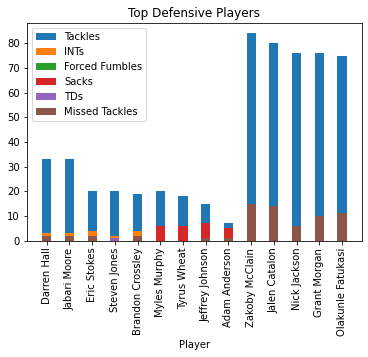

Creation of the directory C:/Users/jkatz/Desktop/Logos failed


In [31]:
############ DEFENSIVE PLOTS ####################
#do some plotting to see how the players stack up on all statistics
figure = plt.figure()
subplot = figure.add_subplot()
plt.bar(defensive_players['full_name'],defensive_players['num_tackles'],0.4,label = 'Tackles')
plt.bar(defensive_players['full_name'],defensive_players['num_interceptions'],0.4,label = 'INTs')
plt.bar(defensive_players['full_name'],defensive_players['num_forced_fumbles'],0.4,label = 'Forced Fumbles')
plt.bar(defensive_players['full_name'],defensive_players['num_sacks'],0.4,label = 'Sacks')
plt.bar(defensive_players['full_name'],defensive_players['num_defensive_touchdowns'],0.4,label = 'TDs')
plt.bar(defensive_players['full_name'],defensive_players['num_missed_tackles'],0.4,label = 'Missed Tackles')

plt.xlabel("Player")
plt.title("Top Defensive Players")
plt.xticks(rotation=90)
plt.legend()
plt.show()


### Plot Tackles vs. Sacks for all Defensive Players with Team Logos as points ###

#Get the logos.... This takes a while

# define the name of the directory to be created
path = filepath + 'Logos'

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
    
#read logos
urls = pd.read_csv('https://raw.githubusercontent.com/spfleming/CFB/master/logos.csv')
for i in range(0,len(urls)):
    try:
        urllib.request.urlretrieve(urls['logo'].iloc[i], filepath + 'Logos/' + urls['school'].iloc[i] + '.png')
    except:
        pass # doing nothing on exception to skip where HTML not found
    
### Plot Tackles vs. Sacks for all Defensive Players with Team Logos as points ###
        
#for adding logos to  to charts
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.2)

#store logos 
logos = os.listdir(filepath + 'Logos')

logo_paths = []
team_names_lst =list(defensive_players['team_name'])

for lst in team_names_lst:
    for i in logos:
        if i.split('.')[0] == lst:
            logo_paths.append(filepath + 'Logos/' + str(i))
        else: 
            continue

x = defensive_players.num_tackles
y = defensive_players.num_sacks
player_names_lst =list(defensive_players['full_name'])
#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with data
ax.scatter(x, y,s=.1)

points=[]
#Adding logos to the chart
for x0, y0, path, name in zip(x, y, logo_paths,player_names_lst):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4 )
    ax.add_artist(ab)
    if [x0,y0] not in points:
        ax.annotate(name, (x0+1,y0+1), fontsize=15) 
    else:
        ax.annotate(name, (x0+1,y0-1), fontsize=15)
    points.append([x0,y0])

xmin=0
ymin=-2
xmax=100
ymax=10
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.axhline(y=0)
plt.axvline(x=0)
#Adding labels and text
ax.set_xlabel('Tackles', fontsize=14)
ax.set_ylabel('Sacks', fontsize=14)
ax.set_title('Sacks vs. Tackles', fontsize=18)


Text(0.5, 1.0, 'Sacks vs. Tackles')

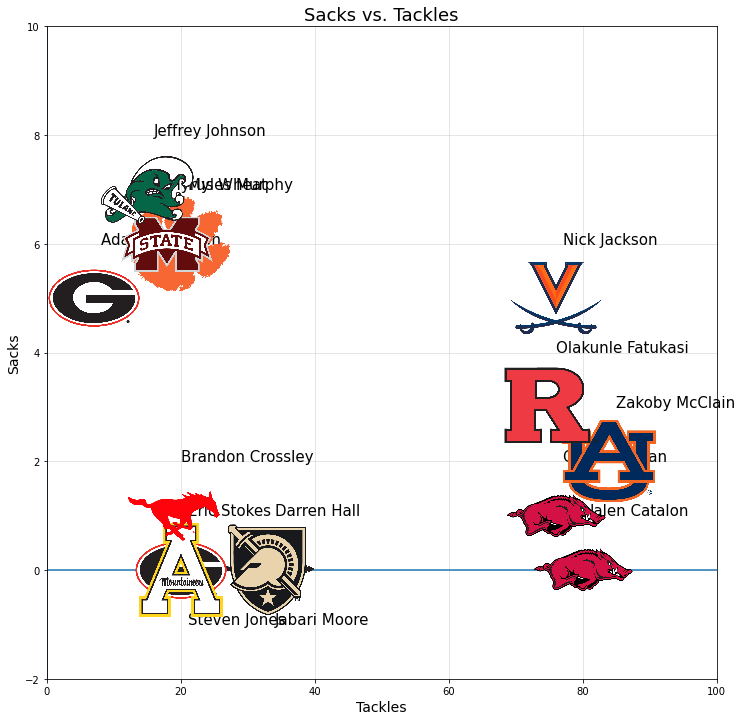

In [34]:

####################### QUERY KICKER DATA  ######################
df_fg = df[df['special_teams_type'] == 'FIELD GOAL'] #only look at field goals
df_fg = df_fg[['kick_result','kick_yards','kicker']] ## Select for these columns
df_fg['kick_result'] = df_fg['kick_result'].astype(str).str[0:4]
df_fg = df_fg[df_fg['kick_result'] != 'BLOC'] ## Remove block field goals as this is not a relevant statistic
totals = pd.crosstab([df_fg.kicker,pd.cut(df_fg.kick_yards,[0.001,20,30,40,50,np.Inf],include_lowest=True)]
                   ,df_fg.kick_result,normalize='index')

totals ## These are the totals (averages for all kickers)
totals = totals.reset_index()
del totals['MISS'] ## We don't care about miss pct
totals.set_index('kicker')
x = totals.copy() ## Copy the DF
x = x.pivot(index='kicker', columns='kick_yards', values='MADE') # Convert the long data to wide
x = x.dropna()
x.head() # This leaves only kickers that have attempted a FG from all ranges
x[(x.iloc[:,0] == 1.0) & (x.iloc[:,1] > .9) & (x.iloc[:,2] > .8) & (x.iloc[:,3] > .7)] ### Desired Stats that I want

#Manipulation Using Crosstab so that I can see each sat based on yardage
#The first crosstab is to find the percentage made then the second is to find the attempts at each range
t1 = pd.crosstab([df_fg.kicker,pd.cut(df_fg.kick_yards,[0.001,20,30,40,50,np.Inf],include_lowest=True)]
                   ,df_fg.kick_result,normalize='index').reset_index()
t2 = pd.crosstab(index=[df_fg['kicker'], pd.cut(df_fg['kick_yards'],[0, 20, 30, 40, 50, np.inf])], 
            columns=df_fg['kick_result'], 
            margins=True, margins_name='Total_Attempts').reset_index()
t1.set_index('kicker')
t2.set_index('kicker')
t2.drop(540)
del t2['kicker']
del t2['kick_yards']
del t2['MADE']
del t2['MISS']
t3 = pd.concat([t1, t2], axis=1)
t3.head()
t3.set_index('kicker')


#Convert the long data to wide data so that I can access all data based on player
t3 = t3.pivot(index='kicker', columns='kick_yards', values=['MADE','Total_Attempts']) # Convert the long data to wide
t3.head()
t3.columns ## View the columns
t3 = t3.drop('nan', axis=1, level=1) ## Drop these 2 columns in our multi index dataframe
t3 = t3.dropna() ## Attempted every range
t3 #View Final Data Frame




MADE                                                     \
kick_yards (0.0, 20.0] (20.0, 30.0] (30.0, 40.0] (40.0, 50.0] (50.0, inf]   
kicker                                                                      
ALAU S26           1.0     1.000000     0.833333     1.000000    0.000000   
ALTR S99           1.0     0.571429     0.750000     0.833333    0.000000   
ALUN S16           1.0     1.000000     1.000000     1.000000    1.000000   
FLMI S30           1.0     1.000000     1.000000     0.800000    1.000000   
GASO S99           1.0     0.875000     0.875000     0.500000    0.000000   
KSST S10           1.0     1.000000     1.000000     0.400000    0.333333   
MIEA S38           1.0     1.000000     1.000000     1.000000    0.333333   
MOUN S92           1.0     1.000000     0.833333     0.666667    0.666667   
NCST S32           1.0     1.000000     0.777778     0.500000    0.666667   
OKUN S47           1.0     1.000000     0.777778     0.600000    0.500000   
PAPT S97           1.0     1.000000     0.666667     0.555556    0.800000   
TNMI S00           1.0     1.000000     0.000000     0.800000    0.000000   
TXSN S48           1.0     1.000000     1.000000     0.833333    0.000000   
TXUN S17           1.0     0.833333     1.000000     0.428571    0.500000   
UTBY S39           1.0     1.000000     1.000000     1.000000    0.666667   
VALB S95           1.0     1.000000     0.500000     0.400000    1.000000   
VAPI S93           1.0     1.000000     0.666667     0.800000    0.500000   
WVUN S30           1.0     0.666667     1.000000     0.666667    0.000000   

           Total_Attempts                                                     
kick_yards    (0.0, 20.0] (20.0, 30.0] (30.0, 40.0] (40.0, 50.0] (50.0, inf]  
kicker                                                                        
ALAU S26              1.0          7.0          6.0          7.0         1.0  
ALTR S99              1.0          7.0          4.0          6.0         2.0  
ALUN S16              1.0          4.0          5.0          2.0         1.0  
FLMI S30              1.0          5.0          8.0          5.0         2.0  
GASO S99              1.0          8.0          8.0          6.0         1.0  
KSST S10              1.0          6.0          2.0          5.0         3.0  
MIEA S38              1.0          4.0          4.0          1.0         3.0  
MOUN S92              3.0          5.0          6.0          3.0         3.0  
NCST S32              1.0          1.0          9.0          2.0         3.0  
OKUN S47              4.0          4.0          9.0          5.0         4.0  
PAPT S97              1.0         11.0          3.0          9.0         5.0  
TNMI S00              1.0          2.0          2.0          5.0         2.0  
TXSN S48              1.0          6.0          5.0          6.0         2.0  
TXUN S17              1.0          6.0          5.0          7.0         2.0  
UTBY S39              1.0          4.0          1.0          5.0         3.0  
VALB S95              1.0          6.0          4.0          5.0         2.0  
VAPI S93              1.0          5.0          3.0         10.0         6.0  
WVUN S30              1.0          3.0          1.0          3.0         1.0

In [35]:
######## FIND KICKERS to TARGET ############

#These are the remaining players I am interested in
#Based on the following critera:
#1) Having attempted a FG from every range
#2) 100% from 0-20 yards
#3) >90% from 20-30 yards
#4) >80% from 30-40 yards
#5) >70% from 40-50 yards
#6) Leave the decision up to the team for the over 50 yard attempts
kickers = t3[(t3.iloc[:,0] == 1.0) & (x.iloc[:,1] > .9) & (x.iloc[:,2] > .8) & (x.iloc[:,3] > .7)]

#merge with defensive players
kickers.set_axis([f"{x}{y}" for x, y in kickers.columns], axis=1, inplace=False)
kickers.columns = kickers.columns.map(lambda x: ''.join([*map(str, x)]))
kickers = kickers.reset_index()
kickers = kickers.rename(columns={'kicker': 'player'})

final_players = pd.merge(left=defensive_players, right =kickers,on='player',  how = 'outer')
final_players['team_code']= final_players["player"].str.split(' ').apply(lambda x: x[0])
final_players["team_name"] = final_players["team_code"].map(teams)
final_players["conferences"] = final_players["team_name"].map(conferences)
final_players['position'] = final_players['position'].replace(np.nan, 'Kicker')
final_players['position_type'] = final_players['position_type'].replace(np.nan, 'Special Teams')


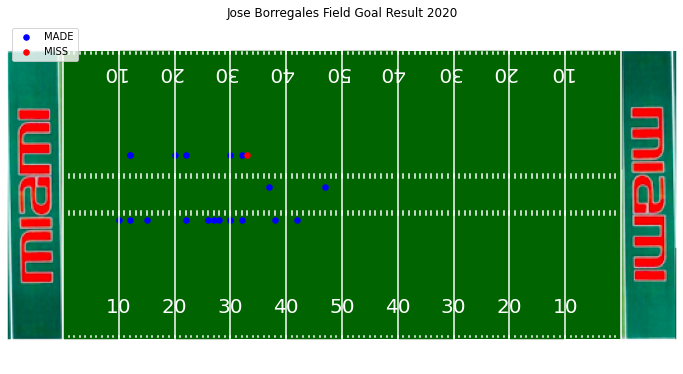

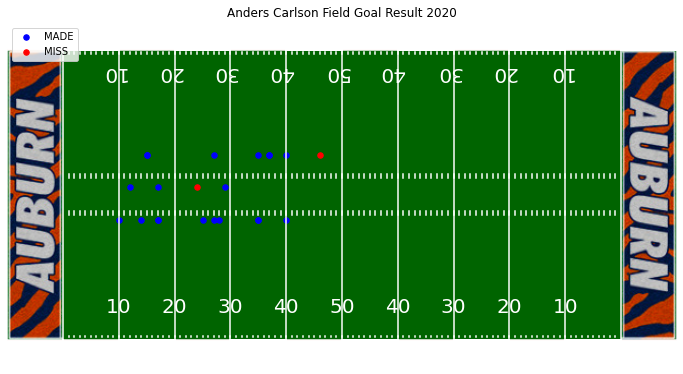

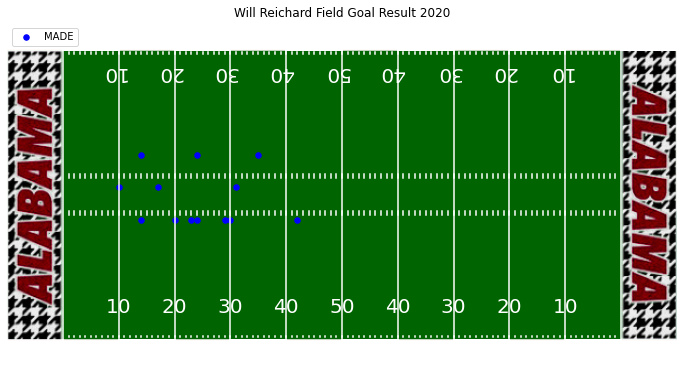

In [37]:

###########GRAPHICS FOR KICKERS##########################

#Graphics - Lets Look at Three Top Prospects (ALAU S26, ALUN S16, FLMIS30)
subset_fg = df[(df['special_teams_type'] == 'FIELD GOAL') & (df['kick_result'] != 'BLOC')]
subset_fg = subset_fg[['kicker','kick_yards','hash','kick_result']]
subset_fg['kick_result'] = subset_fg['kick_result'].astype(str).str[0:4]
subset_fg_all_players = subset_fg
target_kickers=['FLMI S30','ALAU S26','ALUN S16']
subset_fg = subset_fg[subset_fg.kicker.isin(target_kickers)]
subset_fg = subset_fg[subset_fg.kicker.isin(target_kickers)]

subset_fg.loc[subset_fg['kicker'] == 'FLMI S30', 'full_name'] = 'Jose Borregales'
subset_fg.loc[subset_fg['kicker'] == 'ALAU S26', 'full_name'] = 'Anders Carlson'
subset_fg.loc[subset_fg['kicker'] == 'ALUN S16', 'full_name'] = 'Will Reichard'



## Manipulating a new column to fit the plot criteria
hashy = []
for i in subset_fg.hash:
   # print(i)
    if i == 'L':
        hashy.append(22)
    if i == 'C':
        hashy.append(28)
    if i == 'R':
        hashy.append(34)
        
subset_fg['hash_y'] = hashy

### Found based green football field on kaggle @Rob-Mulla Kaggle Grandmaster###
### Change data entry, added a parameter 'ezim' to enter an image address for the endzones
def create_football_field(ezim=None, linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)
    
    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
        #Adding images into the endzone
        if ezim == None:
            ezim == None
        elif ezim != None:
            img = Image.open(ezim)
            im = np.asarray(img)
            im = ax.imshow(im, aspect='auto',interpolation=None, extent=[0,10,0,53.3])      
            im2 = ndimage.rotate(img, 180)
            im2 = ax.imshow(im2,aspect='auto',interpolation=None,extent=[110,120,0,53.3])
        
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                       color='yellow')
    return fig, ax


#Create function for input -- only needs one argument
def fg_plots(kicker):
    dex = subset_fg[subset_fg['kicker'] == kicker].index[0]
    new_name = subset_fg.loc[dex]['full_name']
    fig, ax = create_football_field(ezim=filepath+kicker[0:4]+'.png')
    subset_fg[(subset_fg['kick_result']=='MADE') & (subset_fg['kicker'] == kicker)].plot(x='kick_yards', y='hash_y', kind='scatter', ax=ax, color='blue', s=30, label='MADE')
    if len(subset_fg[(subset_fg['kick_result']=='MISS') & (subset_fg['kicker'] == kicker)]) != 0:
        subset_fg[(subset_fg['kick_result']=='MISS') & (subset_fg['kicker'] == kicker)].plot(x='kick_yards', y='hash_y', kind='scatter', ax=ax, color='red', s=30, label='MISS')
    plt.title(new_name + ' Field Goal Result 2020')
    plt.legend(loc = 'upper left')
    plt.show()

fg_plots('FLMI S30')
fg_plots('ALAU S26')
fg_plots('ALUN S16')


In [39]:
####################QUERIES FOR QUARTER BACKS ##########################
# Get Passes Data
df_passes=df[df['run_pass'] == 'P']
df_passes=df_passes[['play_id','quarterback','pass_result','pass_depth','pass_width', 'touchdown', 'pass_receiver_target', 'incompletion_type']]

df_passes=df_passes[df_passes['pass_result'] != 'RUN']
df_passes=df_passes[df_passes['pass_result'] != 'SACK']

QBDFPasses = pd.crosstab(df_passes['quarterback'], df_passes['pass_result'])

del QBDFPasses['LATERAL']
del QBDFPasses['HIT AS THREW']
QBDFPasses['TotalPasses']= QBDFPasses.sum(axis=1)
QBDFPasses['CompPerc'] = (QBDFPasses['COMPLETE'] / QBDFPasses['TotalPasses']) * 100
QBDFPasses['Touchdowns'] = df_passes.groupby('quarterback').touchdown.count()

QBDFPasses = QBDFPasses[QBDFPasses.TotalPasses >= 200]
QBDFPasses['quarteraback'] = QBDFPasses.index


..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


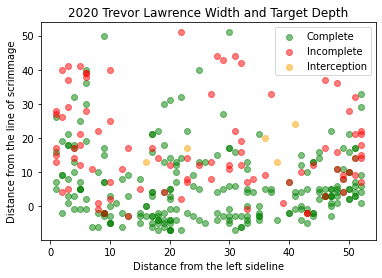

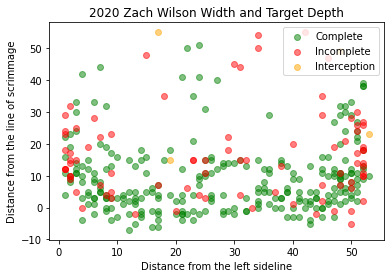

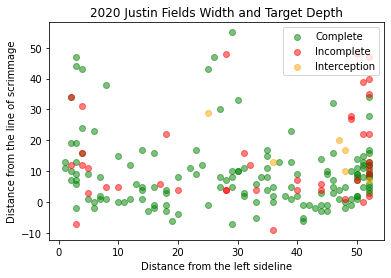

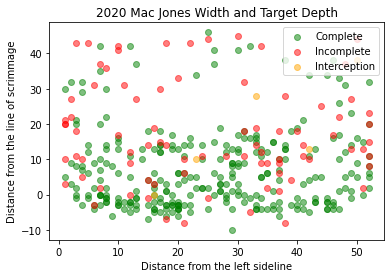

In [40]:
## Plot Passes #only looking at the top 4 quarterback in the draft
## Plot Trevor Lawrence
plt.figure()
TrevorLawrence = df_passes[df_passes['quarterback'] == 'SCCL 16']
TrevorLawrenceCompletions = TrevorLawrence[TrevorLawrence['pass_result'] == 'COMPLETE']
TrevorLawrenceIncompletions = TrevorLawrence[(TrevorLawrence['pass_result'] != 'COMPLETE') & (TrevorLawrence['pass_result'] != 'INTERCEPTION')]
TrevorLawrenceInterceptions = TrevorLawrence[TrevorLawrence['pass_result'] == 'INTERCEPTION']

plt.scatter(TrevorLawrenceCompletions["pass_width"], TrevorLawrenceCompletions["pass_depth"], alpha = .5, c='green', label = "Complete")
plt.scatter(TrevorLawrenceIncompletions["pass_width"], TrevorLawrenceIncompletions["pass_depth"], alpha = .5, c='red', label = "Incomplete")
plt.scatter(TrevorLawrenceInterceptions["pass_width"], TrevorLawrenceInterceptions["pass_depth"], alpha = .5, c='orange', label = "Interception")

plt.title("2020 Trevor Lawrence Width and Target Depth")
plt.xlabel("Distance from the left sideline")
plt.ylabel("Distance from the line of scrimmage")
plt.legend(loc = 'upper right')

num_figures_before = plt.gcf().number

## Zach Wilson
plt.figure()

ZachWilson = df_passes[df_passes['quarterback'] == 'UTBY 01']
ZachWilsonCompletions = ZachWilson[ZachWilson['pass_result'] == 'COMPLETE']
ZachWilsonIncompletions = ZachWilson[(ZachWilson['pass_result'] != 'COMPLETE') & (ZachWilson['pass_result'] != 'INTERCEPTION')]
ZachWilsonInterceptions = ZachWilson[ZachWilson['pass_result'] == 'INTERCEPTION']

plt.scatter(ZachWilsonCompletions["pass_width"], ZachWilsonCompletions["pass_depth"], alpha = .5, c='green', label = "Complete")
plt.scatter(ZachWilsonIncompletions["pass_width"], ZachWilsonIncompletions["pass_depth"], alpha = .5, c='red', label = "Incomplete")
plt.scatter(ZachWilsonInterceptions["pass_width"], ZachWilsonInterceptions["pass_depth"], alpha = .5, c='orange', label = "Interception")

plt.title("2020 Zach Wilson Width and Target Depth")
plt.xlabel("Distance from the left sideline")
plt.ylabel("Distance from the line of scrimmage")
plt.legend(loc = 'upper right')


#unit Test
num_figures_after = plt.gcf().number

class TestPlots(unittest.TestCase):
    def test2(self):
        self.assertGreater(num_figures_after, num_figures_before)


#finalize unit test
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


## Justin Fields
plt.figure()

JustinFields = df_passes[df_passes['quarterback'] == 'OHST 01']
JustinFieldsCompletions = JustinFields[JustinFields['pass_result'] == 'COMPLETE']
JustinFieldsIncompletions = JustinFields[(JustinFields['pass_result'] != 'COMPLETE') & (JustinFields['pass_result'] != 'INTERCEPTION')]
JustinFieldsInterceptions = JustinFields[JustinFields['pass_result'] == 'INTERCEPTION']

plt.scatter(JustinFieldsCompletions["pass_width"], JustinFieldsCompletions["pass_depth"], alpha = .5, c='green', label = "Complete")
plt.scatter(JustinFieldsIncompletions["pass_width"], JustinFieldsIncompletions["pass_depth"], alpha = .5, c='red', label = "Incomplete")
plt.scatter(JustinFieldsInterceptions["pass_width"], JustinFieldsInterceptions["pass_depth"], alpha = .5, c='orange', label = "Interception")

plt.title("2020 Justin Fields Width and Target Depth")
plt.xlabel("Distance from the left sideline")
plt.ylabel("Distance from the line of scrimmage")
plt.legend(loc = 'upper right')

## Mac Jones
plt.figure()

MacJones = df_passes[df_passes['quarterback'] == 'ALUN 10']
MacJonesCompletions = MacJones[MacJones['pass_result'] == 'COMPLETE']
MacJonesIncompletions = MacJones[(MacJones['pass_result'] != 'COMPLETE') & (MacJones['pass_result'] != 'INTERCEPTION')]
MacJonesInterceptions = MacJones[MacJones['pass_result'] == 'INTERCEPTION']

plt.scatter(MacJonesCompletions["pass_width"], MacJonesCompletions["pass_depth"], alpha = .5, c='green', label = "Complete")
plt.scatter(MacJonesIncompletions["pass_width"], MacJonesIncompletions["pass_depth"], alpha = .5, c='red', label = "Incomplete")
plt.scatter(MacJonesInterceptions["pass_width"], MacJonesInterceptions["pass_depth"], alpha = .5, c='orange', label = "Interception")

plt.title("2020 Mac Jones Width and Target Depth")
plt.xlabel("Distance from the left sideline")
plt.ylabel("Distance from the line of scrimmage")
plt.legend(loc = 'upper right')


In [41]:
top_qbs = ['ALUN 10', 'OHST 01','UTBY 01','SCCL 16']

#Add target qbs to a data frame
target_qbs =  QBDFPasses[QBDFPasses.quarteraback.isin(top_qbs)]
target_qbs =target_qbs.rename(columns={'quarteraback': 'player'})


final_players = pd.merge(left=final_players, right =target_qbs,on='player',  how = 'outer')
final_players['position'] = final_players['position'].replace(np.nan, 'Quarterback')
final_players['position_type'] = final_players['position_type'].replace(np.nan, 'Offense')
final_players['team_code']= final_players["player"].str.split(' ').apply(lambda x: x[0])
final_players["team_name"] = final_players["team_code"].map(teams)
final_players["conferences"] = final_players["team_name"].map(conferences)


In [42]:
###############PRINT LIST OF FINAL PLAYERS AND STATS TO CSV FOR FINAL DRAFT BOARD###########
final_players.to_csv(filepath+'draft_targets.csv',index=False)
